In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('metrics_7.csv')

cols = ['time_response_get',
'time_response_post',
'memory_used',
'heap_used',
'non_heap_used',
'cpu_usage']

len(list(df['non_heap_used']))

590

In [3]:
df = df.fillna(0)
df = df.astype({'time_response_get': float, 
                'time_response_post': float, 
                'cpu_usage': float, 
                'available': float, 
                'memory_used': float, 
                'heap_used': float, 
                'non_heap_used': float
                })

i = 0
while i < len(df['non_heap_used']):
  col_values = []
  for column in cols:
    if df[column][i] != 0:
      col_values.append(df[column][i])
  if len(col_values) == 0:
    df['available'][i] = 0
  else:
    df['available'][i] = 1
  i = i + 1

df['available'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([0., 1.])

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=list(df['non_heap_used'][:100]), model='additive', freq=7)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


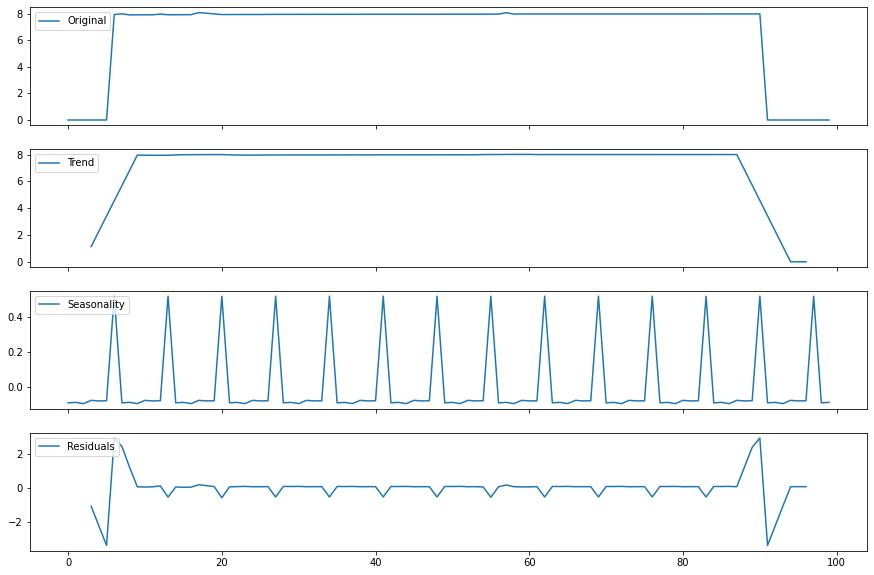

In [5]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(list(df['non_heap_used'][:100]), label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(est_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(est_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(est_residual, label='Residuals')
axes[3].legend(loc='upper left');